<a href="https://colab.research.google.com/github/pinilDissanayaka/Face-Mask-Detection-/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download vijaykumar1799/face-mask-detection

100% 222M/222M [00:08<00:00, 35.7MB/s]
100% 222M/222M [00:08<00:00, 28.3MB/s]


In [4]:
! unzip /content/face-mask-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/with_mask/1890.png  
  inflating: Dataset/with_mask/1891.png  
  inflating: Dataset/with_mask/1892.png  
  inflating: Dataset/with_mask/1893.png  
  inflating: Dataset/with_mask/1894.png  
  inflating: Dataset/with_mask/1895.png  
  inflating: Dataset/with_mask/1896.png  
  inflating: Dataset/with_mask/1897.png  
  inflating: Dataset/with_mask/1898.png  
  inflating: Dataset/with_mask/1899.png  
  inflating: Dataset/with_mask/19.png  
  inflating: Dataset/with_mask/190.png  
  inflating: Dataset/with_mask/1900.png  
  inflating: Dataset/with_mask/1901.png  
  inflating: Dataset/with_mask/1902.png  
  inflating: Dataset/with_mask/1903.png  
  inflating: Dataset/with_mask/1904.png  
  inflating: Dataset/with_mask/1905.png  
  inflating: Dataset/with_mask/1906.png  
  inflating: Dataset/with_mask/1907.png  
  inflating: Dataset/with_mask/1908.png  
  inflating: Dataset/with_mask/1909.png  
  inflating: Dataset/with_ma

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings(action = 'ignore')

In [7]:
rootdir = '/content/Dataset'

In [9]:
out_classes = os.listdir(rootdir)
out_size = len(out_classes)

print(f"outupt classes : {out_classes}")
print(f"output size : {out_size}")

outupt classes : ['without_mask', 'with_mask']
output size : 2


In [25]:
allimg = 0
for i in range(0, out_size):
    print(f"{out_classes[i]} contain {len(os.listdir(rootdir + '/' + out_classes[i]))} images.")
    allimg = (len(os.listdir(rootdir + '/' + out_classes[i]))) + allimg

print(f"Found {allimg} images belonging to {out_size} classes.")

without_mask contain 2994 images.
with_mask contain 2994 images.
Found 5988 images belonging to 2 classes.


Text(0.5, 1.0, 'without_mask')

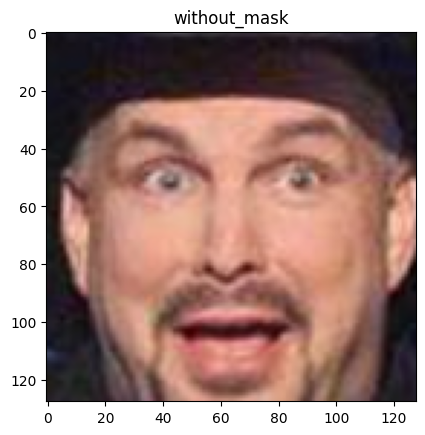

In [15]:
img = plt.imread((rootdir + '/' + out_classes[0] + '/' + (os.listdir(rootdir + '/' + out_classes[0])[1])))
plt.imshow(img)
plt.title(out_classes[0])

Text(0.5, 1.0, 'with_mask')

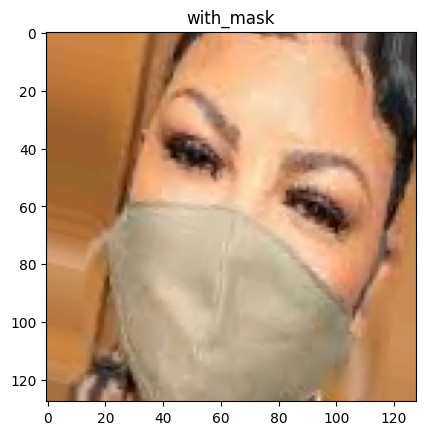

In [17]:
img = plt.imread((rootdir + '/' + out_classes[1] + '/' + (os.listdir(rootdir + '/' + out_classes[1])[1])))
plt.imshow(img)
plt.title(out_classes[1])

In [18]:
img_size = [128, 128, 3]

resnetmodel = ResNet50V2(input_shape = img_size, weights = 'imagenet', include_top=False)

94668760/94668760 [==============================] - 3s 0us/step


In [19]:
for layer in resnetmodel.layers:
  layer.trainable = False

In [20]:
x = Flatten()(resnetmodel.output)
pred = Dense(units= out_size, activation= 'softmax')(x)

model = Model(inputs = resnetmodel.input, outputs  = pred)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [26]:
data_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.6,
                               zoom_range = 0.3,
                               horizontal_flip = True)

In [27]:
df = data_gen.flow_from_directory(rootdir,
                                  target_size = (128, 128),
                                  batch_size = 100,
                                  class_mode= 'categorical')

Found 5988 images belonging to 2 classes.


In [28]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [30]:
model_hist = model.fit_generator(
    df,
    epochs = 2,
    steps_per_epoch = len(df)
)

Epoch 1/2
60/60 [==============================] - 33s 539ms/step - loss: 0.0230 - accuracy: 0.9948
Epoch 2/2
60/60 [==============================] - 31s 521ms/step - loss: 0.0126 - accuracy: 0.9965


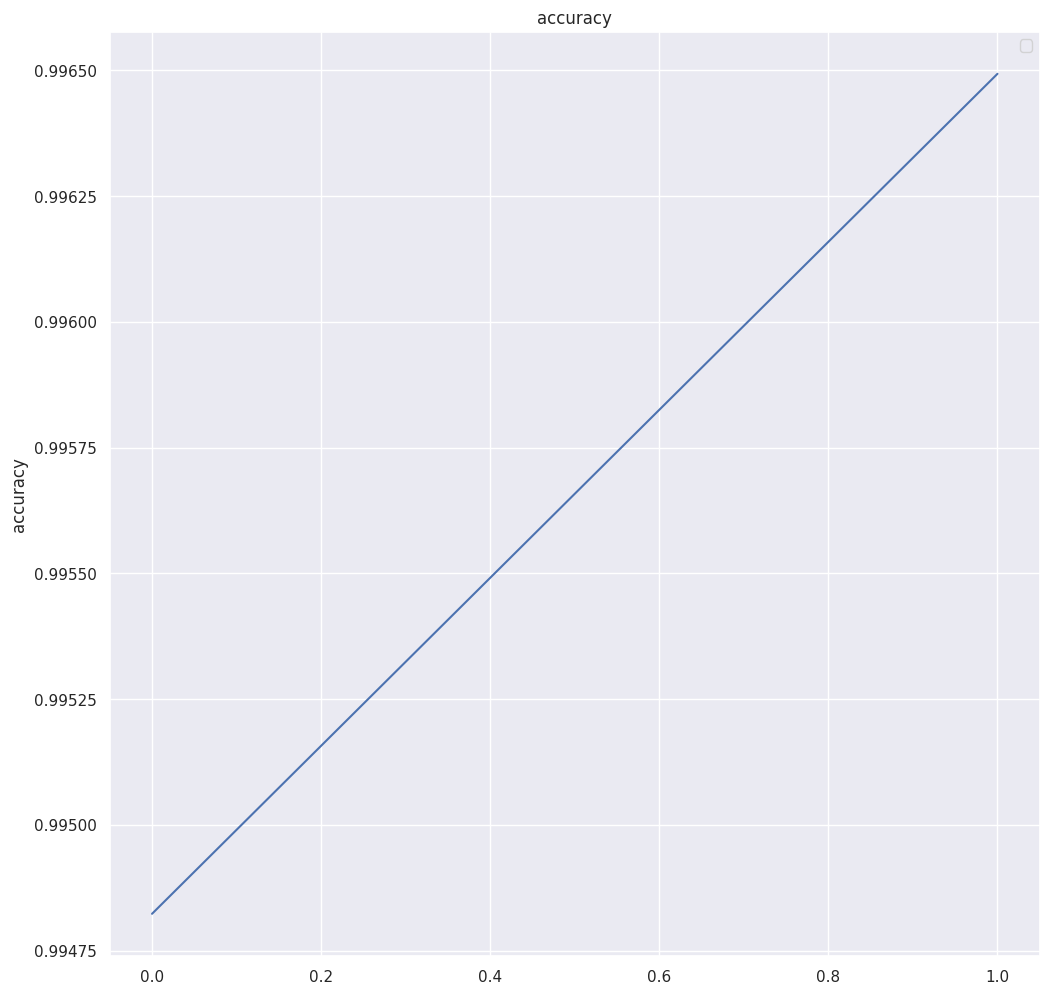

In [31]:
sns.set()
plt.figure(figsize = (12, 12))
plt.title('accuracy')
sns.lineplot(data = model_hist.history, x = range(len(model_hist.history['accuracy'])), y = 'accuracy')
plt.legend()
plt.show()

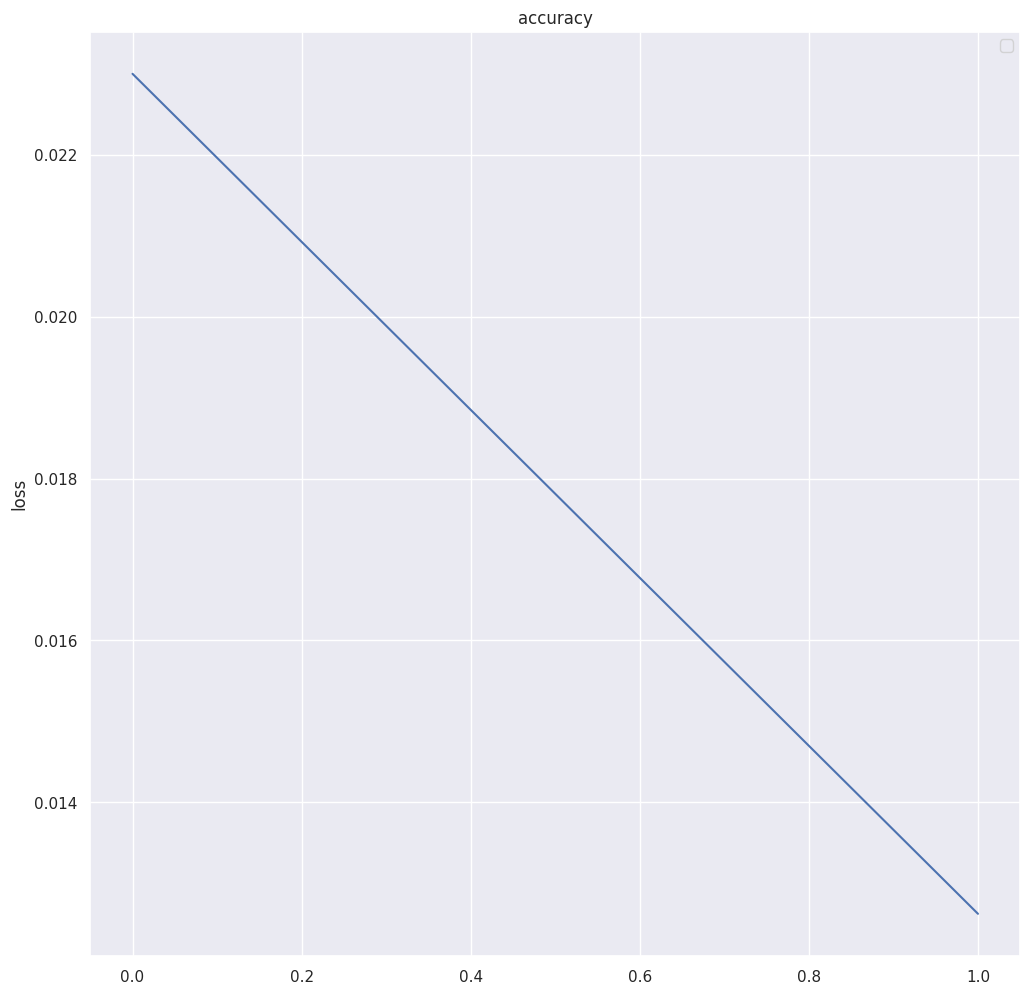

In [32]:
sns.set()
plt.figure(figsize = (12, 12))
plt.title('accuracy')
sns.lineplot(data = model_hist.history, x = range(len(model_hist.history['loss'])), y = 'loss')
plt.legend()
plt.show()